In [1]:
import matplotlib.pyplot as plt
import os
import fsspec 

from oorcas import HydrophoneDay
from datetime import timedelta, datetime
from pathlib import Path 
from obspy import Trace, Stream, UTCDateTime

from IPython.display import Audio

In [2]:
FILL_VALUE=None
METHOD=1

In [3]:
# are there whales?
hyd = HydrophoneDay("CE04OSBP-LJ01C-11-HYDBBA105", "2024/02/11")

https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2024/02/11/


In [4]:
print(hyd.date.year)
print(hyd.date.month)
print(hyd.date.day)

2024
2
11


In [5]:
hyd.file_str

'CE04OSBP-LJ01C-11-HYDBBA105_2024_02_11'

In [6]:
%%time
hyd.read_and_repair_gaps(fill_value=FILL_VALUE, method=METHOD, wav_data_subtype="PCM_32")

total traces before concatenation: 601
There are 19200000 samples in this stream, Simply concatenating
total traces before concatenation: 601
There are 19200000 samples in this stream, Simply concatenating
total traces before concatenation: 599
There are 19200000 samples in this stream, Simply concatenating
total traces before concatenation: 601
There are 19200000 samples in this stream, Simply concatenating
total traces after concatenation: 1
total traces after concatenation: 1
total traces before concatenation: 601
There are 19200000 samples in this stream, Simply concatenating
total traces after concatenation: 1
total traces after concatenation: 1
total traces before concatenation: 601
There are 19200000 samples in this stream, Simply concatenating
total traces before concatenation: 601
There are 19200000 samples in this stream, Simply concatenating
total traces after concatenation: 1
total traces before concatenation: 598
There are 19200000 samples in this stream, Simply concatenat

In [7]:
hyd.clean_list[:5]

[1 Trace(s) in Stream:
OO.HYEA1..YDH | 2024-02-11T00:30:00.000000Z - 2024-02-11T00:34:59.999984Z | 64000.0 Hz, 19200000 samples,
 1 Trace(s) in Stream:
OO.HYEA1..YDH | 2024-02-11T00:15:00.000000Z - 2024-02-11T00:19:59.999984Z | 64000.0 Hz, 19200000 samples,
 1 Trace(s) in Stream:
OO.HYEA1..YDH | 2024-02-11T00:05:00.000000Z - 2024-02-11T00:09:59.999984Z | 64000.0 Hz, 19200000 samples,
 1 Trace(s) in Stream:
OO.HYEA1..YDH | 2024-02-11T00:40:00.000000Z - 2024-02-11T00:44:59.999984Z | 64000.0 Hz, 19200000 samples,
 1 Trace(s) in Stream:
OO.HYEA1..YDH | 2024-02-11T01:05:00.000000Z - 2024-02-11T01:09:59.999984Z | 64000.0 Hz, 19200000 samples]

In [8]:
%%time
# when creating a single stream we want fill value of none so that large gaps remain gaps
hyd.create_single_stream(fill_value=None, method=1)

2024-10-21 20:34:18.204 | INFO     | oorcas.hydrophone_day:create_single_stream:121 - Merging to a single stream for the day


MemoryError: Unable to allocate 5.94 GiB for an array with shape (1593600000,) and data type int32

In [9]:
%%time
day_fig = hyd.plot_spectrogram(avg_time=1, L=2048)

IndexError: list index out of range

In [10]:
out_dir = Path('spectrograms') / str(hyd.date.year) / str(hyd.date.month) / str(hyd.date.day)

In [11]:
out_dir.mkdir(parents=True, exist_ok=True)

In [12]:
day_fig.savefig(out_dir / f"{hyd.file_str}_daily.png", bbox_inches='tight')

NameError: name 'day_fig' is not defined

In [14]:
starts_of_hours = [(hyd.date + timedelta(hours=i)) for i in range(24)]
ends_of_hours = [(hyd.date + timedelta(hours=i, minutes=59, seconds=59, microseconds=999999)) for i in range(24)]

In [15]:
hour_intervals = list(zip(starts_of_hours, ends_of_hours))

KeyboardInterrupt: 

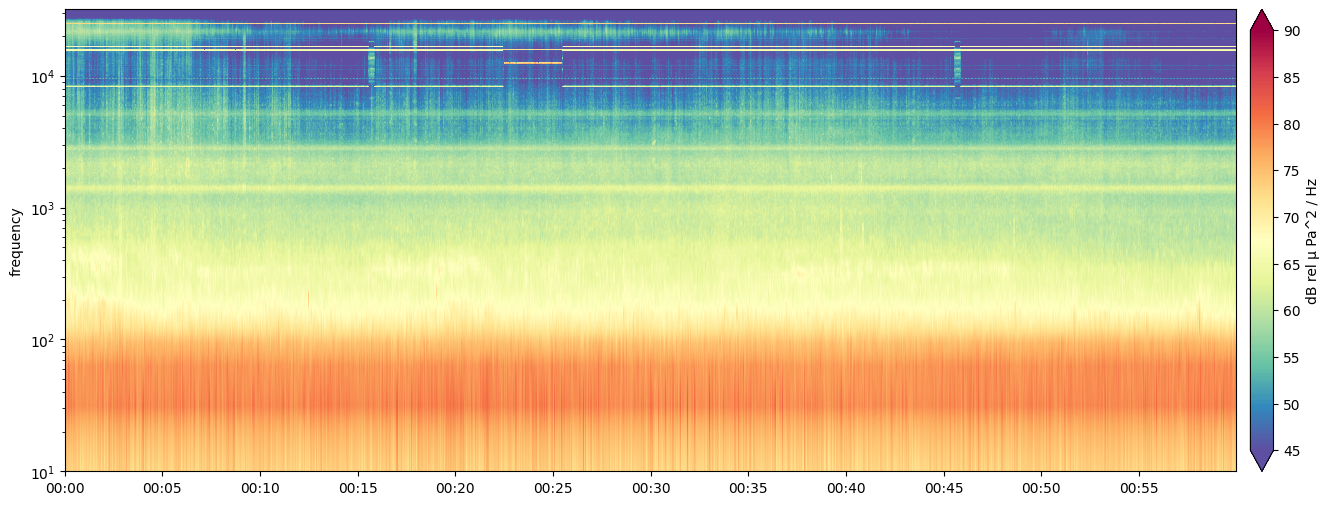

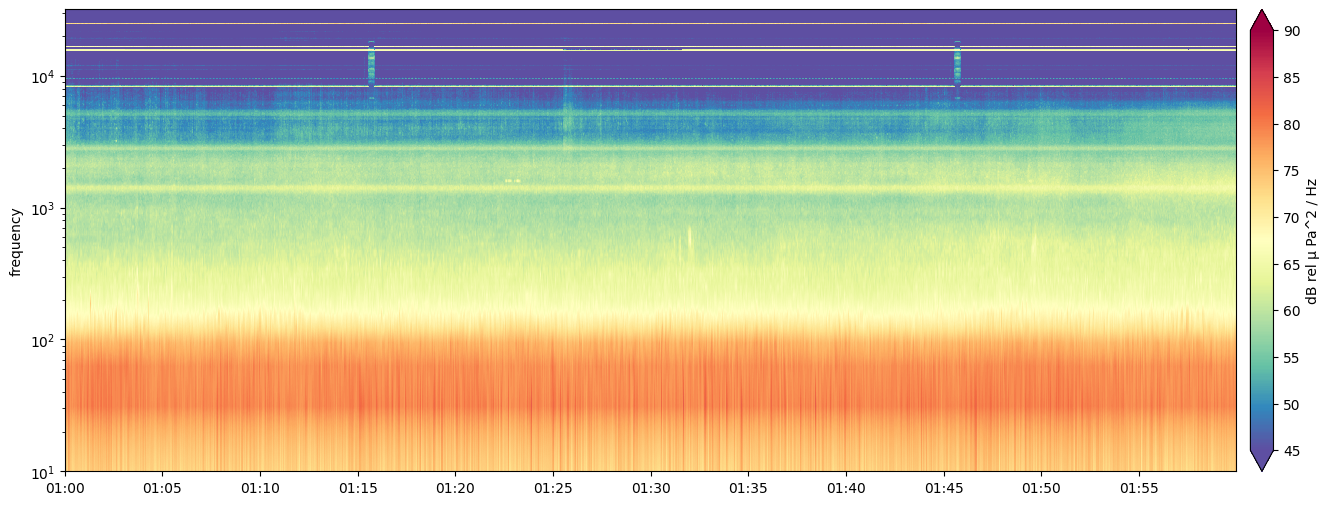

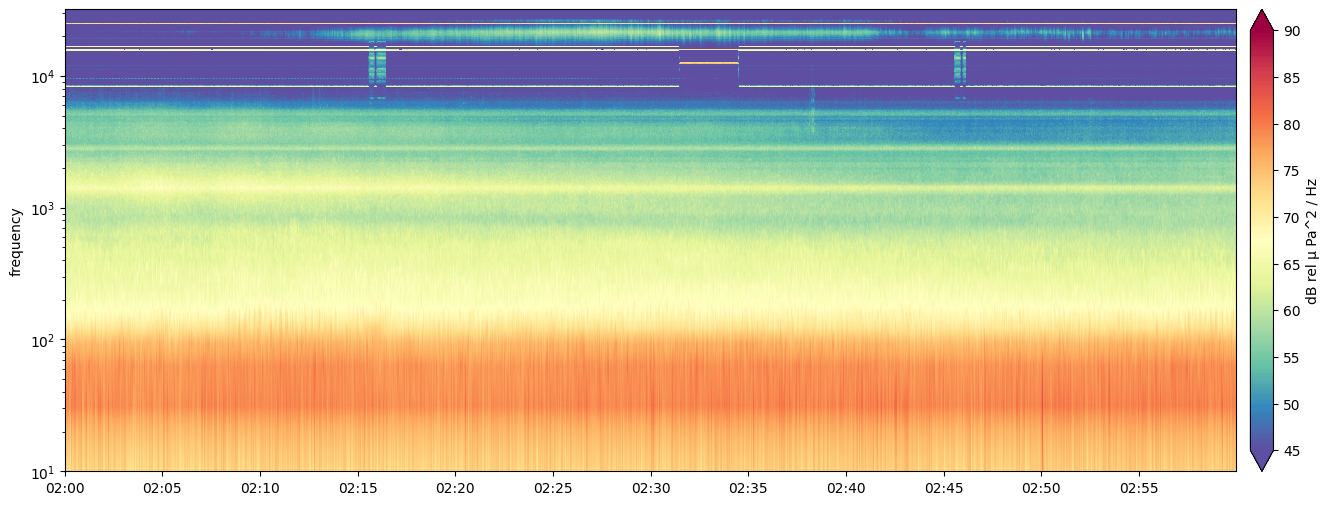

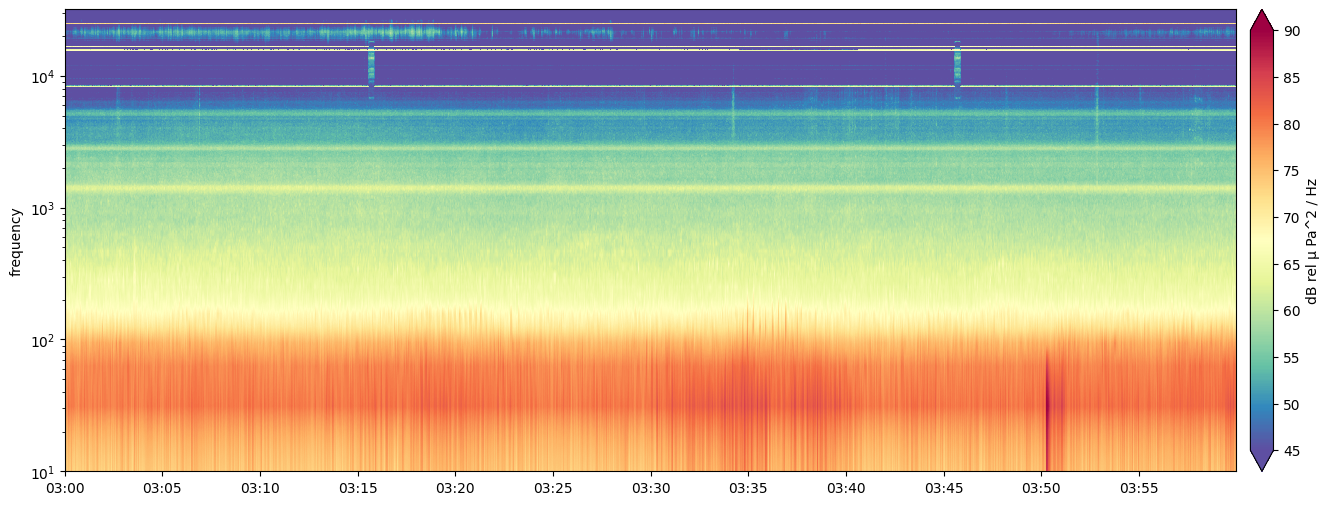

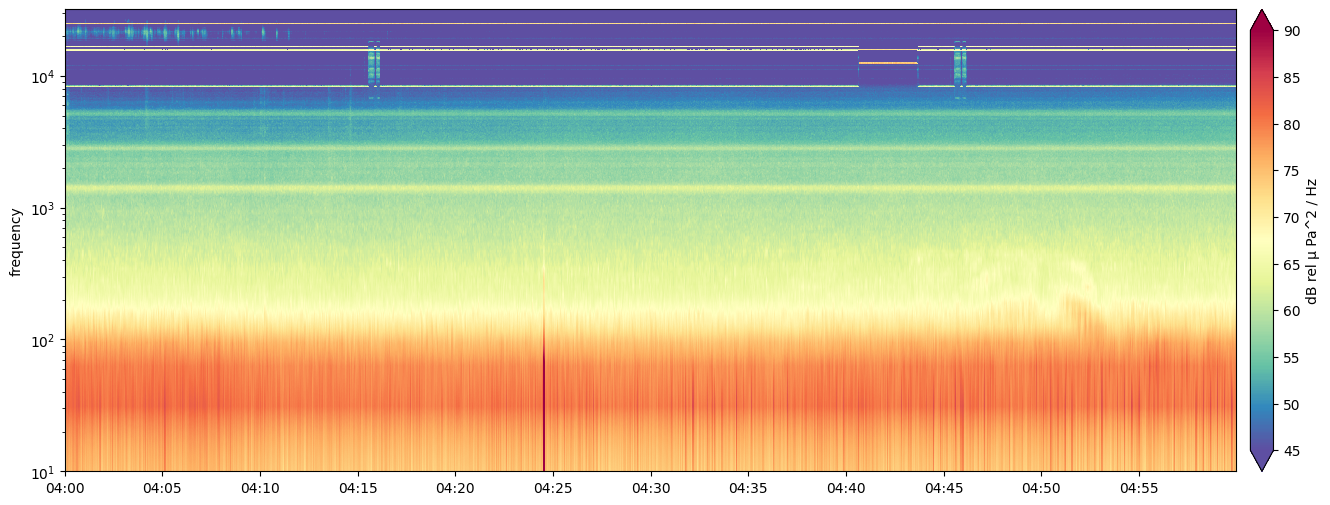

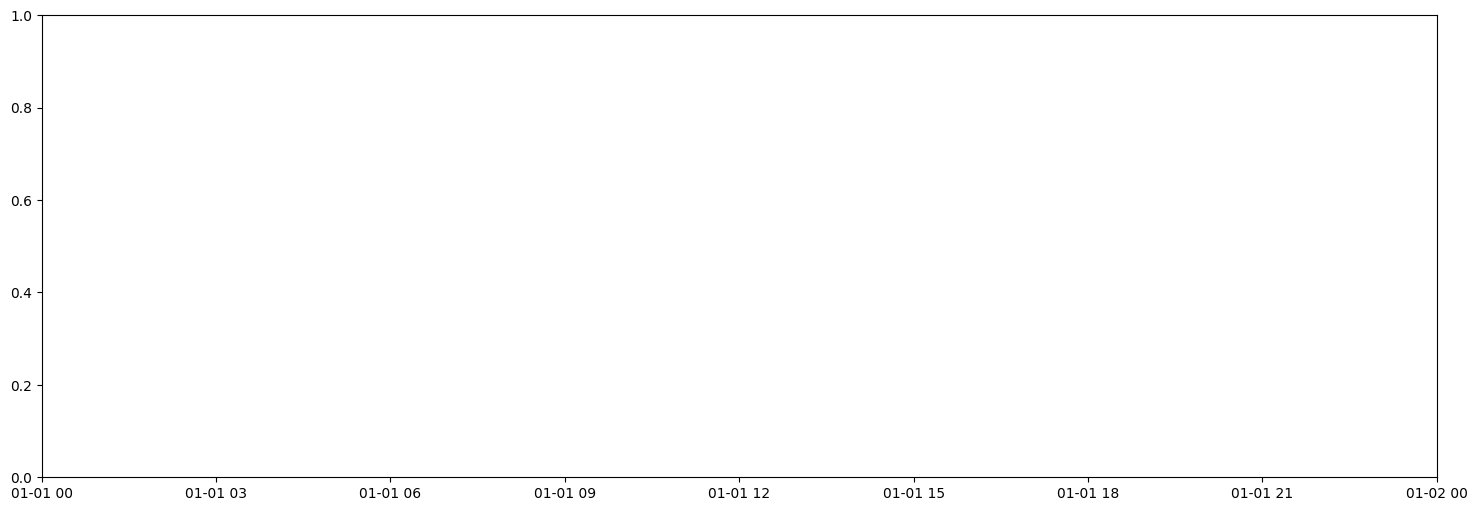

In [16]:
# DISABLE PLOT.SHOW to improve performance?
for i , _ in enumerate(hour_intervals):
    fig = hyd.plot_spectrogram(avg_time=1, L=2048, sel=(hour_intervals[i][0], hour_intervals[i][1]))
    file_name = f"{hyd.file_str}_T{hour_intervals[i][0].hour}.png"
    file_path = os.path.join(out_dir, file_name)
    fig.savefig(file_path, bbox_inches='tight')